If you are running in colab, select tensorflow version 1.x:

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


Or, if running locally, you need tensorflow version below 2

In [ ]:
#!pip install -q 'tensorflow-gpu<2'

In [ ]:
!pip install -q 'scipy<=1.2.1'  # scipy.misc.imread is deprecated in later versions

In [ ]:
!git clone https://github.com/titu1994/Neural-Style-Transfer.git

fatal: destination path 'Neural-Style-Transfer' already exists and is not an empty directory.


In [ ]:
dir_path = "Neural-Style-Transfer"

# Network Type

Choose the network type below : 

- "Network" for the original style transfer
- "INetwork" for the improved style transfer (default)

In [ ]:
NETWORK = 'INetwork' + '.py'

In [ ]:
# List all the arguments that can be supplied to Network.py
!python {dir_path}/{NETWORK} -h

Using TensorFlow backend.
usage: INetwork.py [-h] [--style_masks STYLE_MASKS [STYLE_MASKS ...]]
                   [--content_mask CONTENT_MASK] [--color_mask COLOR_MASK]
                   [--image_size IMG_SIZE] [--content_weight CONTENT_WEIGHT]
                   [--style_weight STYLE_WEIGHT [STYLE_WEIGHT ...]]
                   [--style_scale STYLE_SCALE]
                   [--total_variation_weight TV_WEIGHT] [--num_iter NUM_ITER]
                   [--model MODEL] [--content_loss_type CONTENT_LOSS_TYPE]
                   [--rescale_image RESCALE_IMAGE]
                   [--rescale_method RESCALE_METHOD]
                   [--maintain_aspect_ratio MAINTAIN_ASPECT_RATIO]
                   [--content_layer CONTENT_LAYER] [--init_image INIT_IMAGE]
                   [--pool_type POOL] [--preserve_color COLOR]
                   [--min_improvement MIN_IMPROVEMENT]
                   base ref [ref ...] res_prefix

Neural style transfer with Keras.

positional arguments:
  base     

# Network Parameters

Here, we will setup all of the parameters for the `Network.py` script.

In [ ]:
# Image size
IMAGE_SIZE = 500

# Loss Weights
CONTENT_WEIGHT = 0.025
STYLE_WEIGHT = 1.0
STYLE_SCALE = 1.0
TOTAL_VARIATION_WEIGHT = 8.5e-5
CONTENT_LOSS_TYPE = 0

# Training arguments
NUM_ITERATIONS = 10
MODEL = 'vgg19'
RESCALE_IMAGE = 'false'
MAINTAIN_ASPECT_RATIO = 'false'  # Set to false if OOM occurs

# Transfer Arguments
CONTENT_LAYER = 'conv' + '5_2'  # only change the number 5_2 to something in a similar format
INITIALIZATION_IMAGE = 'content'
POOLING_TYPE = 'max'

# Extra arguments
PRESERVE_COLOR = 'false'
MIN_IMPROVEMENT = 0.0

# Content Image

Run the below cell to upload the Content Image. Make sure to select **just 1 image**

In [ ]:
from google.colab import files

content_img = files.upload()

Saving content4.jpg to content4.jpg


In [ ]:
import os

CONTENT_IMAGE_FN = list(content_img)[0]
CONTENT_IMAGE_FN_temp = CONTENT_IMAGE_FN.strip().replace(" ", "_")

if CONTENT_IMAGE_FN != CONTENT_IMAGE_FN_temp:
  os.rename(CONTENT_IMAGE_FN, CONTENT_IMAGE_FN_temp)
  CONTENT_IMAGE_FN = CONTENT_IMAGE_FN_temp
  
print("Content image filename :", CONTENT_IMAGE_FN)

Content image filename : content4.jpg


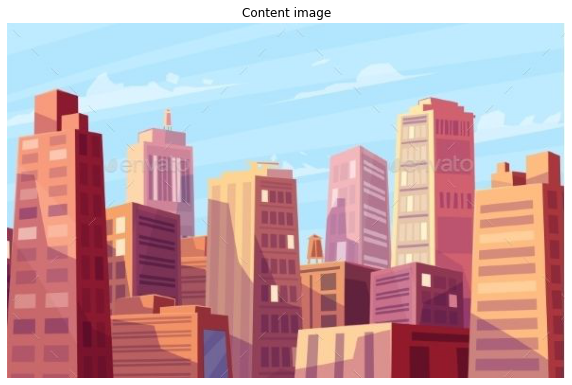

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
img = plt.imread(CONTENT_IMAGE_FN)
plt.axis('off')
plt.title('Content image')
plt.imshow(img)

# Style Image

Run the below cell to upload the Style Image. Make sure to select **just 1 image**

In [ ]:
style_img = files.upload()

Saving style4.jpg to style4.jpg


In [ ]:
STYLE_IMAGE_FN = list(style_img)[0]
STYLE_IMAGE_FN_temp = STYLE_IMAGE_FN.strip().replace(" ", "_")

if STYLE_IMAGE_FN != STYLE_IMAGE_FN_temp:
  os.rename(STYLE_IMAGE_FN, STYLE_IMAGE_FN_temp)
  STYLE_IMAGE_FN = STYLE_IMAGE_FN_temp

print("Style image filename :", STYLE_IMAGE_FN)

Style image filename : style4.jpg


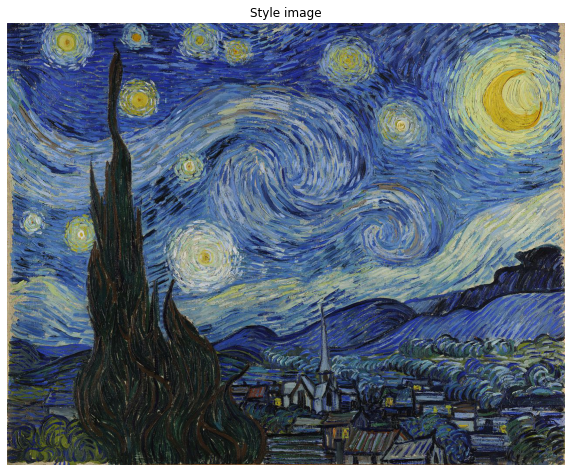

In [ ]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread(STYLE_IMAGE_FN)
plt.axis('off')
plt.title('Style image')
plt.imshow(img)

# Generate Image

Run the below cells to generate the image

In [ ]:
import os

RESULT_DIR = "generated/"
RESULT_PREFIX = RESULT_DIR + "gen"
FINAL_IMAGE_PATH = RESULT_PREFIX + "_at_iteration_%d.png" % (NUM_ITERATIONS)

if not os.path.exists(RESULT_DIR):
  os.makedirs(RESULT_DIR)

In [ ]:
!python {dir_path}/{NETWORK} {CONTENT_IMAGE_FN} {STYLE_IMAGE_FN} {RESULT_PREFIX} \
  --image_size {IMAGE_SIZE} --content_weight {CONTENT_WEIGHT} --style_weight \
  {STYLE_WEIGHT} --style_scale {STYLE_SCALE} --total_variation_weight \
  {TOTAL_VARIATION_WEIGHT} --content_loss_type {CONTENT_LOSS_TYPE} --num_iter \
  {NUM_ITERATIONS} --model {MODEL} --rescale_image {RESCALE_IMAGE} \
  --maintain_aspect_ratio {MAINTAIN_ASPECT_RATIO} --content_layer {CONTENT_LAYER} \
  --init_image {INITIALIZATION_IMAGE} --pool_type {POOLING_TYPE} --preserve_color \
  {PRESERVE_COLOR} --min_improvement {MIN_IMPROVEMENT}

Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

80142336/80134624 [==============================] - 1s 0us/step
2021-10-24 20:21:58.398712: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-10-24 20:21:58.463703: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-24 20:21:58.464534: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
2021-10-24 20:21:58.478850: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-10-24 20:21:58.724835: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dyna

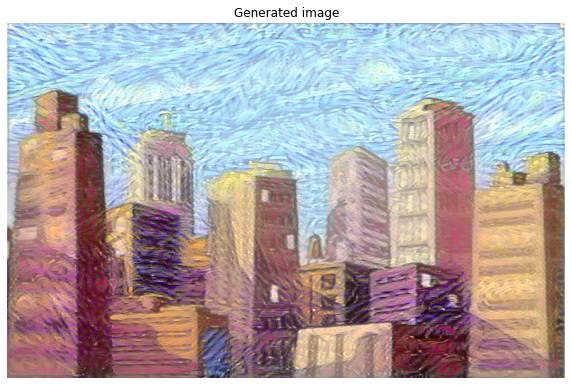

In [ ]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread(FINAL_IMAGE_PATH)
plt.axis('off')
plt.title('Generated image')
plt.imshow(img)

# (Optional) Color Transfer

If you wish for color transfer between the content image and the generated image, then run the next cell, else skip to "Download Generated Image" section

In [ ]:
COLOR_TRANSFER = 'color_transfer.py'
COLOR_FINAL_IMAGE_PATH = FINAL_IMAGE_PATH[:-4] + '_%s_color.png'

# Optional - Use Histogram matching (0 for no, 1 for yes)
HISTOGRAM_MATCH = 0

if HISTOGRAM_MATCH == 0:
  COLOR_FINAL_IMAGE_PATH = COLOR_FINAL_IMAGE_PATH % ('original')
else:
  COLOR_FINAL_IMAGE_PATH = COLOR_FINAL_IMAGE_PATH % ('histogram')
  

!python {dir_path}/{COLOR_TRANSFER} {CONTENT_IMAGE_FN} {FINAL_IMAGE_PATH} --hist_match {HISTOGRAM_MATCH}

Neural-Style-Transfer/color_transfer.py:116: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  generated_image = imread(args.generated_image, mode="RGB")
Neural-Style-Transfer/color_transfer.py:119: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  content_image = imread(args.content_image, mode=mode)
Neural-Style-Transfer/color_transfer.py:120: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
    Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  content_image = imresize(content_image, (img_width, img_height), interp='bicubic')
Neural-Style-Transfer/color_transfer.py:58: DeprecationWarning:     `toimage` is deprecated!
    `toimage` is deprecated in SciPy 1.0.0, and will be rem

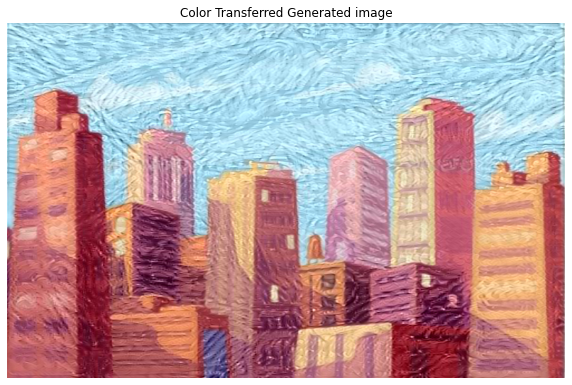

In [ ]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread(COLOR_FINAL_IMAGE_PATH)
plt.axis('off')
plt.title('Color Transferred Generated image')
plt.imshow(img)

# Download Color Transfered Image

Run the following cell to download the color transferred result

In [ ]:
# download the color transfered image
files.download(COLOR_FINAL_IMAGE_PATH)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Download Generated Image

Run the following cell to download the final result

In [ ]:
files.download(FINAL_IMAGE_PATH)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
from google.colab import files

csv = files.upload()

Saving submission.csv to submission.csv


In [2]:
import pandas as pd

In [17]:
csv = str(list(csv.values())[0]).split(",")[1:]

In [34]:
for i in range(len(csv)):
  if "\\" in csv[i]:
    csv[i] = csv[i][:csv[i].index("\\")]

In [36]:
column0 = csv[0]
column1 = csv[1]
csv = csv[2:]

['7981.jpg',
 '18',
 '12666.jpg',
 '79',
 '13288.jpg',
 '55',
 '6234.jpg',
 '99',
 '1269.jpg',
 '117',
 '3863.jpg',
 '122',
 '6241.jpg',
 '148',
 '10304.jpg',
 '76',
 '623.jpg',
 '15',
 '2193.jpg',
 '18',
 '11925.jpg',
 '117',
 '3750.jpg',
 '26',
 '11378.jpg',
 '87',
 '2008.jpg',
 '79',
 '10730.jpg',
 '18',
 '5982.jpg',
 '131',
 '7737.jpg',
 '88',
 '2081.jpg',
 '26',
 '10597.jpg',
 '70',
 '6588.jpg',
 '17',
 '10054.jpg',
 '99',
 '12992.jpg',
 '84',
 '7966.jpg',
 '85',
 '3919.jpg',
 '6',
 '6197.jpg',
 '68',
 '10924.jpg',
 '11',
 '6399.jpg',
 '51',
 '9960.jpg',
 '18',
 '13201.jpg',
 '131',
 '3757.jpg',
 '3',
 '9131.jpg',
 '131',
 '13856.jpg',
 '87',
 '9620.jpg',
 '99',
 '9062.jpg',
 '99',
 '4489.jpg',
 '18',
 '3138.jpg',
 '152',
 '10213.jpg',
 '40',
 '3417.jpg',
 '87',
 '6074.jpg',
 '25',
 '5705.jpg',
 '56',
 '8953.jpg',
 '50',
 '764.jpg',
 '40',
 '5307.jpg',
 '18',
 '7894.jpg',
 '11',
 '5039.jpg',
 '40',
 '10305.jpg',
 '29',
 '4407.jpg',
 '87',
 '1700.jpg',
 '98',
 '1786.jpg',
 '90',
 '

In [37]:
predictions = {}
for i in range(len(csv)):
  if i % 2 == 0:
    key = csv[i]
  else:
    predictions[key] = int(csv[i])

In [39]:
len(predictions)

14115

In [49]:
df = pd.DataFrame(predictions.values(), columns=[column1], index=predictions.keys())

In [52]:
df.index.names = [column0]

In [57]:
df.to_csv("submission.csv")